### ABSTRACT

#### In the insurance industry, predicting insurance premiums accurately is crucial for both insurance companies and policyholders. This study aims to develop a linear regression model to predict insurance premiums based on various factors such as age, sex, BMI, children, smoker, region, and charges. The dataset used for this study is the Insurance Dataset, which contains information about individuals including their insurance premiums.

#### The linear regression model is trained on a portion of the dataset and evaluated using metrics such as Mean Absolute Error (MAE) and R-squared value. The model is then used to predict insurance premiums for the remaining portion of the dataset.

#### The results show that the linear regression model performs reasonably well in predicting insurance premiums based on the given factors. However, further refinement and feature engineering could potentially improve the accuracy of the predictions. Overall, this study demonstrates the potential of using linear regression for insurance premium prediction, which could benefit both insurance companies and policyholders in making informed decisions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.size

9366

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [9]:
data.duplicated().sum()

1

In [10]:
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
children = data['children'].value_counts()
print(children)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [12]:
print(type(children))

<class 'pandas.core.series.Series'>


In [13]:
children_gt_100=children[children>100].index.tolist()
print(children_gt_100)

[0, 1, 2, 3]


In [14]:
sum(children[children>100])

1295

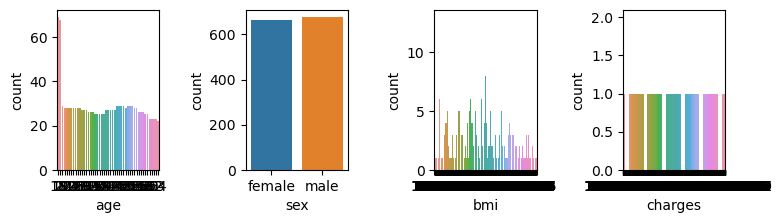

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

amenities_cols=data.drop(columns=['children','smoker','region']).columns
plt.figure(figsize=(15, 15))
for n,variable in enumerate (amenities_cols):
    ax=plt.subplot(7,8,n+1)
    g=sns.countplot(data=data,x=data[variable],ax=ax)
plt.tight_layout()

In [16]:
data.replace(9,np.nan,inplace=True)
data.dropna(inplace=True)

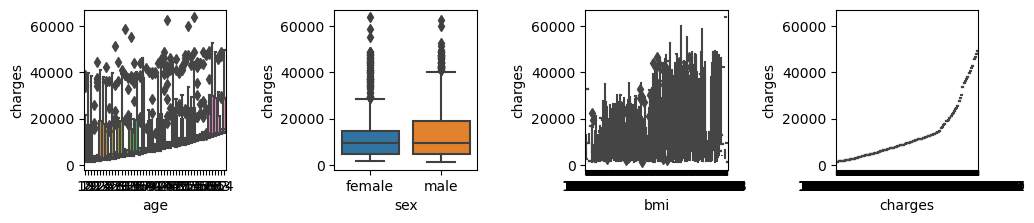

In [17]:
plt.figure(figsize=(15, 15))
amenities_cols=data.drop(columns=['children','smoker','region']).columns

for n,variable in enumerate (amenities_cols):
    ax=plt.subplot(7,6,n+1)
    g=sns.boxplot(data=data,x=data[variable],y=data['charges'],ax=ax)
plt.tight_layout()

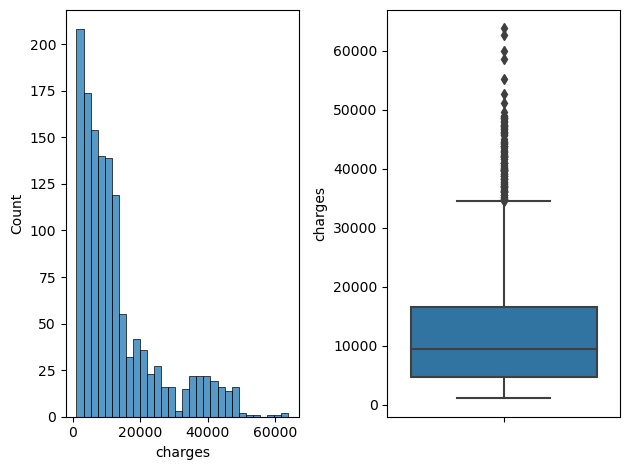

In [18]:
plt.subplot(1,2,1)
_=sns.histplot(x='charges',data=data)

plt.subplot(1,2,2)
_=sns.boxplot(y='charges',data=data)

plt.tight_layout()

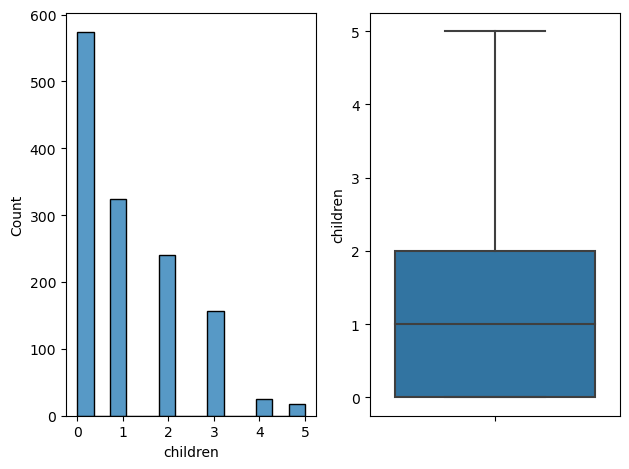

In [19]:
plt.subplot(1,2,1)
_=sns.histplot(x='children',data=data)

plt.subplot(1,2,2)
_=sns.boxplot(y='children',data=data)
plt.tight_layout()

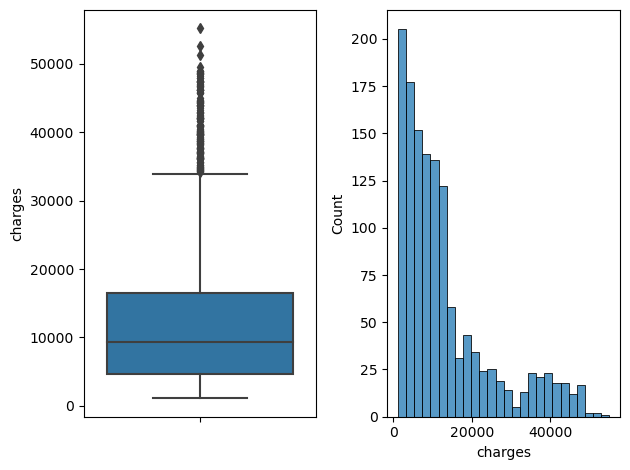

In [20]:
Q1=data['charges'].quantile(0.25)
Q3=data['charges'].quantile(0.75)
IQR=Q3-Q1
filter_price=(data['charges']>=Q1-3.5*IQR) & (data['charges']<=Q3+3.5*IQR)
data=data.loc[filter_price]

## plot boxplot and histplot after removing outliers above and below 3.5 IQR

plt.subplot(1,2,1)
_=sns.boxplot(y='charges',data=data)

plt.subplot(1,2,2)
_=sns.histplot(x='charges',data=data)
plt.tight_layout()

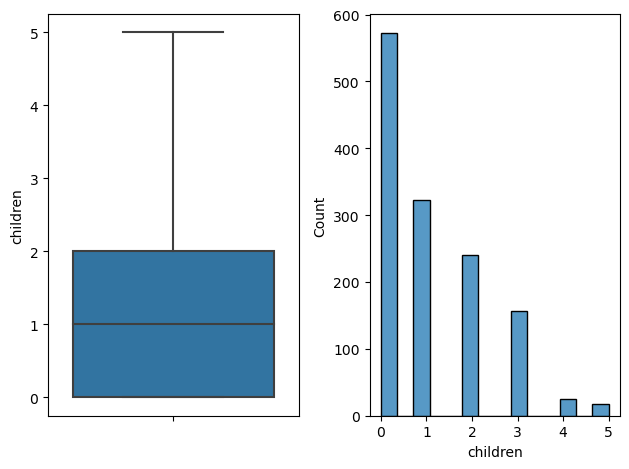

In [21]:
# drop observations greter than some value
data=data[data['children']<=6000]
# plot boxplot and histplot after removing outliers
plt.subplot(1,2,1)
_=sns.boxplot(y='children',data=data)

plt.subplot(1,2,2)
_=sns.histplot(x='children',data=data)
plt.tight_layout()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12040\298637231.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.drop(columns=['sex']).corr()


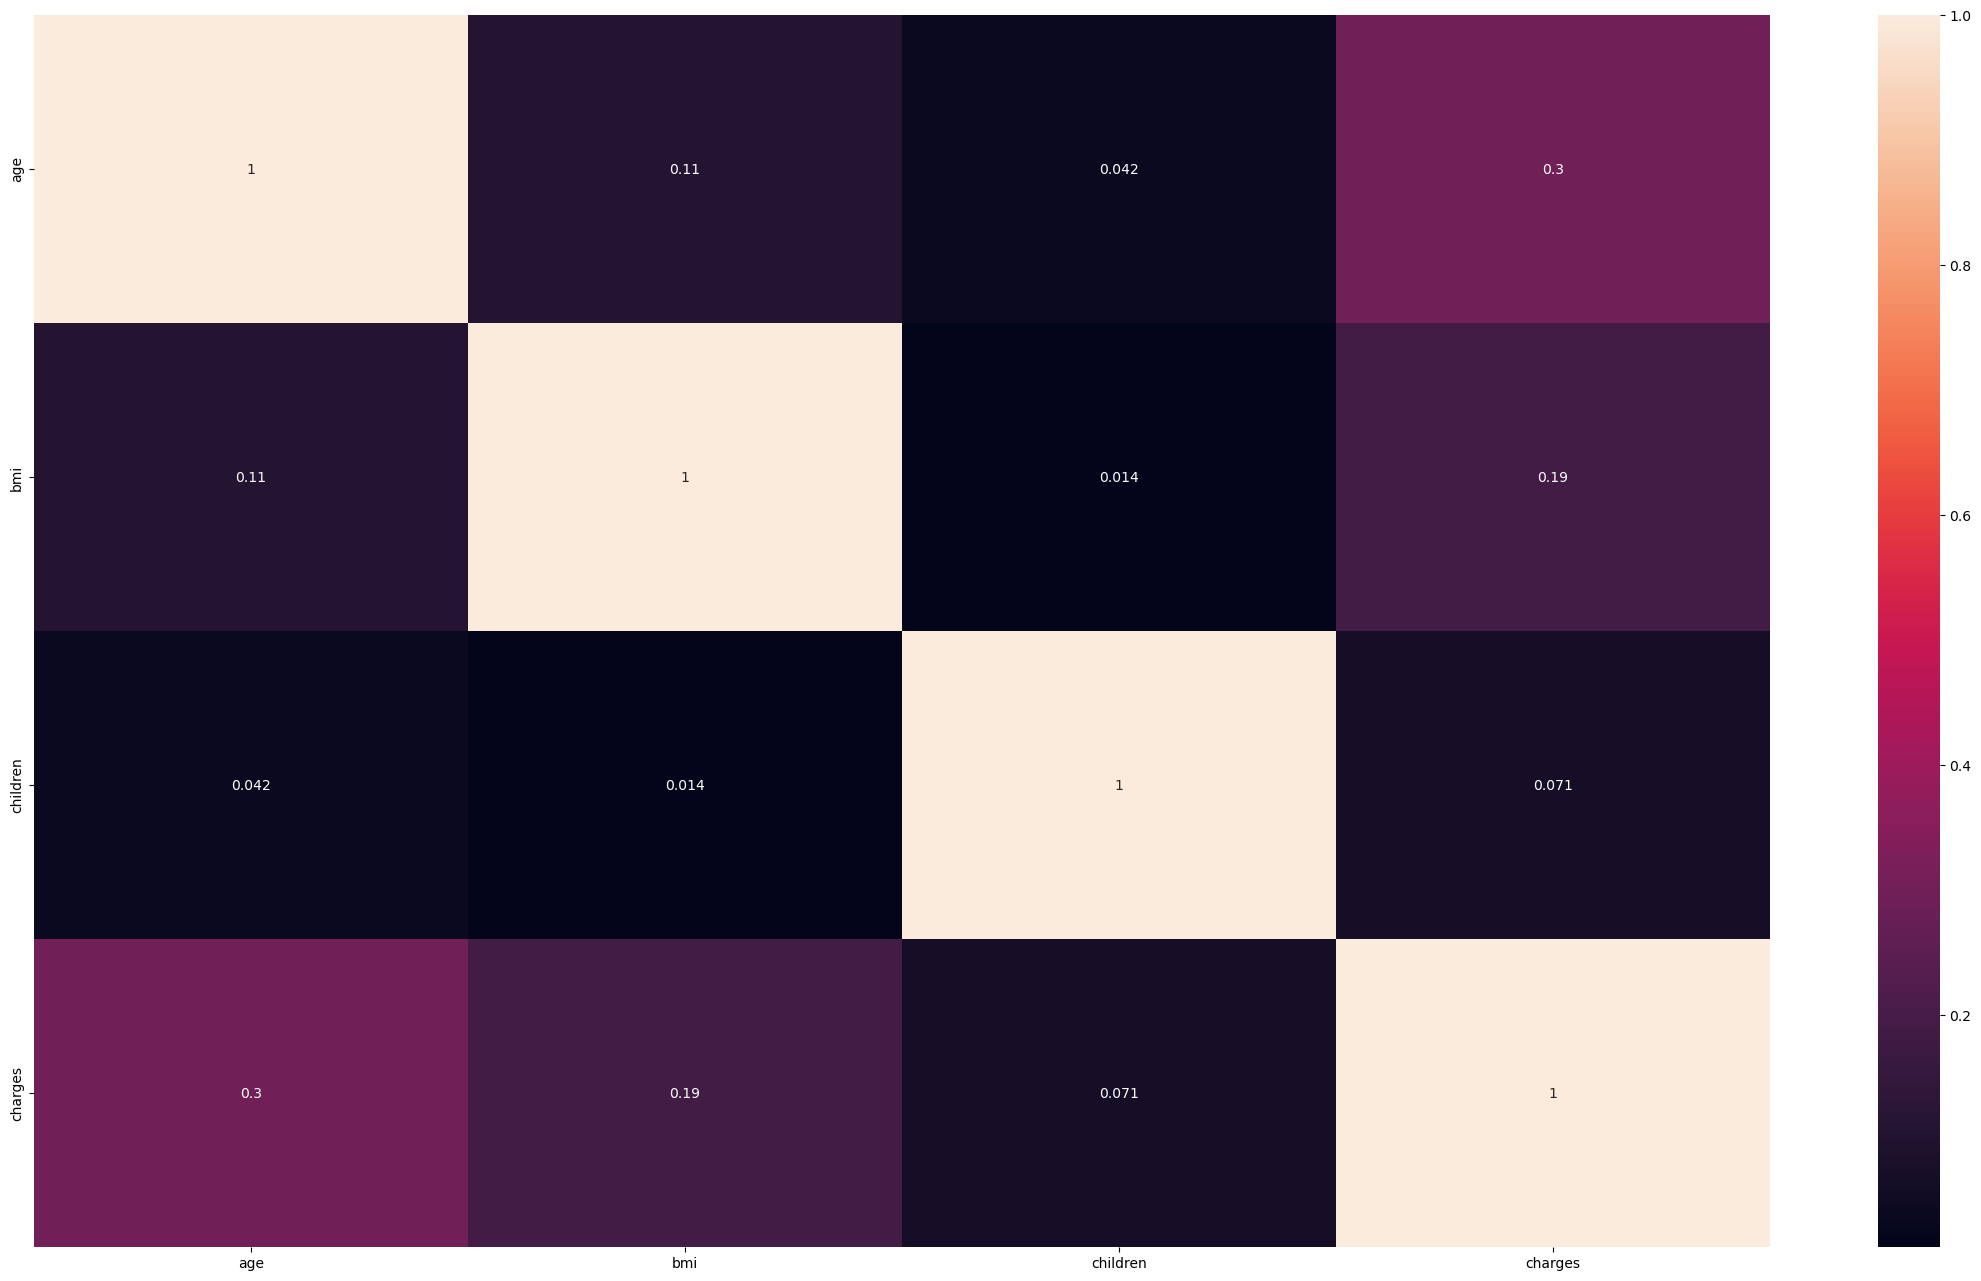

In [22]:
corr_matrix=data.drop(columns=['sex']).corr()
plt.figure(figsize=(28,16))
sns.heatmap(data=corr_matrix,annot=True)
plt.show()

In [23]:
data['charges']=np.log1p(data['charges'])

In [24]:
data['children']=np.log1p(data['children'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_12040\722155145.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.drop(columns=['sex']).corr()


Columns with correlation above 0.35 with 'charges': 
['age', 'charges']


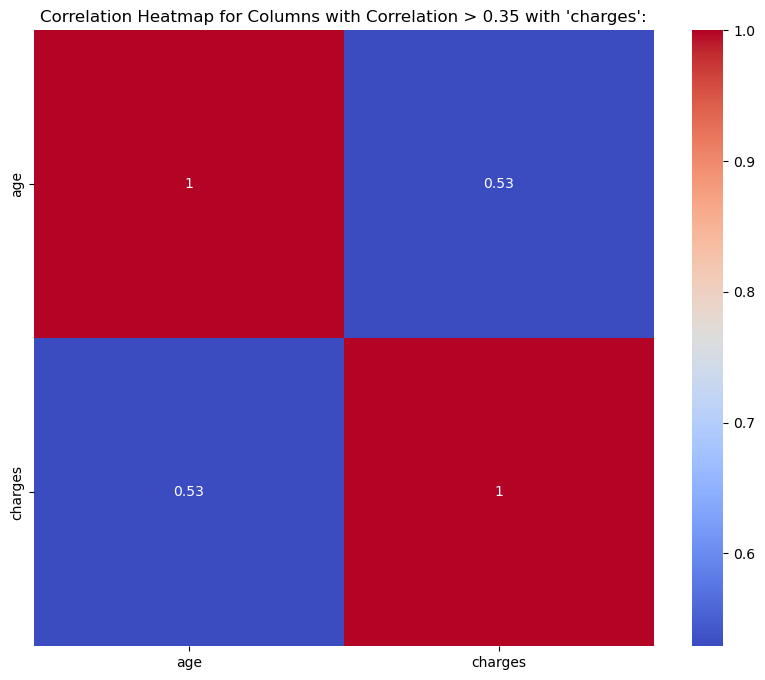

In [25]:
# calculating the corrleation matrix
corr_matrix=data.drop(columns=['sex']).corr()
correlation_threshold=0.35
high_corr_columns=corr_matrix.loc[(corr_matrix['charges']>correlation_threshold),'charges'].index.tolist()
print(f"Columns with correlation above {correlation_threshold} with 'charges': ")
print(high_corr_columns)

high_corr_data=data[high_corr_columns]
# calculate the correlation matrix for the selected columns
corr_matrix_high_corr=high_corr_data.corr()
# plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data=corr_matrix_high_corr,annot=True,cmap='coolwarm')
plt.title(f"Correlation Heatmap for Columns with Correlation > {correlation_threshold} with 'charges':")
plt.show()

In [26]:
x=high_corr_data.drop(columns='charges',axis=1)
y=high_corr_data['charges']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#modelling
model=LinearRegression()
model.fit(x_train,y_train)
#prediction
y_pred=model.predict(x_test)
#calculate R2
r2=r2_score(y_test,y_pred)
#calculate adjusted R2
n=len(y_test)
p=x_train.shape[1] #no. of prediction
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)

mae=np.mean(np.abs(y_pred-y_test))
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(f'R-sqaured(R2):{r2}')
print(f'Adjusted R-sqaured:{adjusted_r2}')
print(f"Mean Absolute Error (MAE):{mae}")
print(f"Mean Squared Error (MSE):{mse}")
print(f" Root Mean Squared Error (RMSE):{rmse}")


R-sqaured(R2):0.33911489891667423
Adjusted R-sqaured:0.33662099287485037
Mean Absolute Error (MAE):0.6101892468359896
Mean Squared Error (MSE):0.5511645494306702
 Root Mean Squared Error (RMSE):0.7424045726089449


In [29]:
import joblib
joblib.dump(model,'linear_regression_insurance.joblib')

['linear_regression_insurance.joblib']

In [30]:
loaded_model=joblib.load('linear_regression_insurance.joblib')
age =45
bmi=1
charges=9
children=8
input_data=[age]
output_data=loaded_model.predict([input_data]) # 2D
print(f"The predicted price is Rs.{round(output_data[0])}/-")

The predicted price is Rs.9/-


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
